### prototype ablation和classifier head strategies结果 summary，关于prototype的实验结果

In [2]:
%config InlineBackend.figure_format = 'svg' 
# 如果要保存svg格式图片，可以用上面的命令

import os
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

# plt.style.use("ggplot")

In [3]:
from glob import glob

root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

## loop 所有满足条件的exp name
lists = ['new_ABMIL_tile5k_all', # 不用prototype 也不用cross attention 
         'PhiTrans_tile5000_twice500_0abmil_0sel_cls_keep_embedd_dim', # 不用prototype 用cross attention，prototype默认是feats ; 用qkv那种思路实现
         'PhiTrans_tile5000_twice500_0abmil_0sel_randomprototype', # 用prototype 用cross attention，prototype random values
         'new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform', # 用prototype 也用cross attention，但是prototype是random uniform且优化的
         'new_PhiTrans_align_sim_tile5ktwice500' # # 用prototype 也用cross attention，prototype是cluster且优化的
         ]

exp_folder_lists = [os.path.join(root_path, li) for li in lists if os.path.isdir(os.path.join(root_path, li))]


total_pd = pd.DataFrame()
for exp_name in exp_folder_lists:
    print(exp_name)
    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[:, 3:]
    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
# total_pd.to_csv(os.path.join(root_path, "prototype_ablation.csv"))

/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_ABMIL_tile5k_all
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/PhiTrans_tile5000_twice500_0abmil_0sel_cls_keep_embedd_dim
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/PhiTrans_tile5000_twice500_0abmil_0sel_randomprototype
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile5ktwice500


,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,pos_support,accuracy,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
0,0.803279,0.544444,0.649007,90.0,0.539326,0.800000,0.644295,60.0,0.646667,0.671302,0.672222,0.646651,150.0,0.697698,0.646667,0.647122,150.0,0.672222,0.707222
1,0.779412,0.588889,0.670886,90.0,0.548780,0.750000,0.633803,60.0,0.653333,0.664096,0.669444,0.652344,150.0,0.687159,0.653333,0.656053,150.0,0.669444,0.737778
2,0.836364,0.511111,0.634483,90.0,0.536842,0.850000,0.658065,60.0,0.646667,0.686603,0.680556,0.646274,150.0,0.716555,0.646667,0.643915,150.0,0.680556,0.712222
3,0.836066,0.566667,0.675497,90.0,0.561798,0.833333,0.671141,60.0,0.673333,0.698932,0.700000,0.673319,150.0,0.726358,0.673333,0.673754,150.0,0.700000,0.718704
4,0.806452,0.555556,0.657895,90.0,0.545455,0.800000,0.648649,60.0,0.653333,0.675953,0.677778,0.653272,150.0,0.702053,0.653333,0.654196,150.0,0.677778,0.745370
5,0.812314,0.553333,0.657553,90.0,0.546440,0.806667,0.651190,60.0,0.654667,0.679377,0.680000,0.654372,150.0,0.705965,0.654667,0.655008,150.0,0.680000,0.724259
6,0.024192,0.028760,0.016622,0.0,0.009811,0.038370,0.014156,0.0,0.010954,0.013648,0.012012,0.011062,0.0,0.015535,0.010954,0.011602,0.0,0.012012,0.016541
0,0.600000,1.000000,0.750000,90.0,0.000000,0.000000,0.000000,60.0,0.600000,0.300000,0.500000,0.375000,150.0,0.360000,0.600000,0.450000,150.0,0.500000,0.500000
1,0.759494,0.666667,0.710059,90.0,0.577465,0.683333,0.625954,60.0,0.673333,0.668479,0.675000,0.668007,150.0,0.686682,0.673333,0.676417,150.0,0.675000,0.744630
2,0.820513,0.711111,0.761905,90.0,0.638889,0.766667,0.696970,60.0,0.733333,0.729701,0.738889,0.729437,150.0,0.747863,0.733333,0.735931,150.0,0.738889,0.819259


HEROHE 数据集不同head strategies

In [73]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

## loop 所有满足条件的exp name
mapping_exp = {'baseline': 'new_ABMIL_tile5k_all',
    'transformer': 'new_PhiTrans_align_sim+tile5ktwice500_trans_sim', 
         'attention score': 'new_PhiTrans_align_sim+tile5ktwice500_cls_abmil_sim',
         'mean': 'new_PhiTrans_align_sim_tile5ktwice500'
}


mapping_color = {'baseline': '#D2D351', # 不用prototype 也不用cross attention
                 'transformer': '#C5D4E0', 
         'attention score': '#dfadfd',
         'mean': '#dafdfa'
}


total_pd = pd.DataFrame()
for exp_name in mapping_exp.values():
    exp_name = os.path.join(root_path, exp_name)
    print(exp_name)

    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[:, 3:]
    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
total_pd.to_csv(os.path.join(root_path, "classifier_strategies_HEROHE.csv"))




/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_ABMIL_tile5k_all
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim+tile5ktwice500_trans_sim
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim+tile5ktwice500_cls_abmil_sim
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile5ktwice500


>>>>>>>>>>>>>>>>>>>>>>>baseline: new_ABMIL_tile5k_all
#D2D351
>>>>>>>>>>>>>>>>>>>>>>>transformer: new_PhiTrans_align_sim+tile5ktwice500_trans_sim
#C5D4E0
>>>>>>>>>>>>>>>>>>>>>>>attention score: new_PhiTrans_align_sim+tile5ktwice500_cls_abmil_sim
#dfadfd
>>>>>>>>>>>>>>>>>>>>>>>mean: new_PhiTrans_align_sim_tile5ktwice500
#dafdfa


[Text(0.35, 0, 'balanced acc'), Text(1.35, 0, 'auc')]

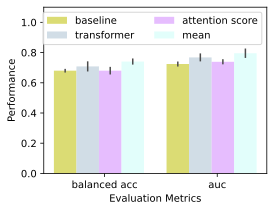

In [66]:

bar_data_mean = {}
bar_data_std = {}
for one_exp in mapping_exp.keys():
    exp_name = mapping_exp[one_exp]
    exp_color = mapping_color[one_exp]

    print(f">>>>>>>>>>>>>>>>>>>>>>>{one_exp}: {exp_name}")

    eval_res = pd.read_csv(os.path.join(root_path, exp_name, filename))
    
    tb_barplot = eval_res.loc[:, ['balanced acc', 'auc']]
    # tb_barplot = eval_res.iloc[:, 3:]

    bar_row_names = tb_barplot.columns

    bar_data_mean.update({one_exp:tb_barplot.iloc[-2,:]})
    bar_data_std.update({one_exp:tb_barplot.iloc[-1,:]})
    
    print(exp_color)



fig, ax = plt.subplots(figsize=(4, 3))

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(bar_row_names))

bar_dist = 0
width = 0.2
for one_exp in bar_data_mean.keys():    
    ax.bar(xticks+bar_dist, bar_data_mean[one_exp], 
           width=width, label=one_exp, color=mapping_color[one_exp],
           alpha=0.8,
           yerr=bar_data_std[one_exp], error_kw={'ecolor': '0.3'},
        #    edgecolor="black",  # 柱子边框的颜色    
        #    linewidth=1.0  # 柱子边框线的大小
           )
    bar_dist += width

# ax.set_title("Grouped Bar plot", fontsize=15)
ax.set_facecolor("white")
ax.set(
    ylim=[0.0, 1.1],
)
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Performance")
ax.legend(loc=0, ncols=2, fontsize='medium', facecolor="white")

# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.35)
ax.set_xticklabels(bar_row_names)

Yale数据集的classifier ehad strategies

In [74]:
root_path = "/home/cyyan/Projects/HER2proj/models/Yale/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

## loop 所有满足条件的exp name
mapping_exp = {'baseline': 'ABMIL_tile5k',
    'transformer': 'PhiTrans_tile100_twiceAll_0abmil_0sel_trans_sim', 
         'attention score': 'PhiTrans_tile100_twiceAll_0abmil_0sel_cls_abmil_sim',
         'mean': 'PhiTrans_tile100_twiceAll_0abmil_0sel'
}


mapping_color = {'baseline': '#D2D351', # 不用prototype 也不用cross attention
                 'transformer': '#C5D4E0', 
         'attention score': '#dfadfd',
         'mean': '#dafdfa'
}


total_pd = pd.DataFrame()
for exp_name in mapping_exp.values():
    exp_name = os.path.join(root_path, exp_name)
    print(exp_name)

    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[-2:, 3:]
    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
total_pd.to_csv(os.path.join(root_path, "classifier_strategies_Yale.csv"))




/home/cyyan/Projects/HER2proj/models/Yale/HER2status/ABMIL_tile5k
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile100_twiceAll_0abmil_0sel_trans_sim
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile100_twiceAll_0abmil_0sel_cls_abmil_sim
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile100_twiceAll_0abmil_0sel


>>>>>>>>>>>>>>>>>>>>>>>baseline: ABMIL_tile5k
#D2D351
>>>>>>>>>>>>>>>>>>>>>>>transformer: PhiTrans_tile100_twiceAll_0abmil_0sel_trans_sim
#C5D4E0
>>>>>>>>>>>>>>>>>>>>>>>attention score: PhiTrans_tile100_twiceAll_0abmil_0sel_cls_abmil_sim
#dfadfd
>>>>>>>>>>>>>>>>>>>>>>>mean: PhiTrans_tile100_twiceAll_0abmil_0sel
#dafdfa


[Text(0.35, 0, 'balanced acc'), Text(1.35, 0, 'auc')]

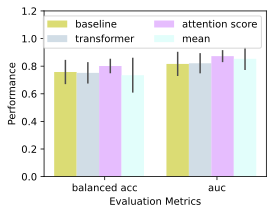

In [72]:

bar_data_mean = {}
bar_data_std = {}
for one_exp in mapping_exp.keys():
    exp_name = mapping_exp[one_exp]
    exp_color = mapping_color[one_exp]

    print(f">>>>>>>>>>>>>>>>>>>>>>>{one_exp}: {exp_name}")

    eval_res = pd.read_csv(os.path.join(root_path, exp_name, filename))
    
    tb_barplot = eval_res.loc[:, ['balanced acc', 'auc']]
    # tb_barplot = eval_res.iloc[:, 3:]

    bar_row_names = tb_barplot.columns

    bar_data_mean.update({one_exp:tb_barplot.iloc[-2,:]})
    bar_data_std.update({one_exp:tb_barplot.iloc[-1,:]})
    
    print(exp_color)



fig, ax = plt.subplots(figsize=(4, 3))

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(bar_row_names))

bar_dist = 0
width = 0.2
for one_exp in bar_data_mean.keys():    
    ax.bar(xticks+bar_dist, bar_data_mean[one_exp], 
           width=width, label=one_exp, color=mapping_color[one_exp],
           alpha=0.8,
           yerr=bar_data_std[one_exp], error_kw={'ecolor': '0.3'},
        #    edgecolor="black",  # 柱子边框的颜色    
        #    linewidth=1.0  # 柱子边框线的大小
           )
    bar_dist += width

# ax.set_title("Grouped Bar plot", fontsize=15)
ax.set_facecolor("white")
ax.set(
    ylim=[0.0, 1.20],
)
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Performance")
ax.legend(loc=0, ncols=2, fontsize='medium', facecolor="white")

# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.35)
ax.set_xticklabels(bar_row_names)